# Visualization and Further Exploration

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('merged.csv')

In [6]:
#remember GEOID == tract
df.head()

,GEOID,State_fips,County_fips,Metro_code,Hub_distance,County_abrev,Full_county,Metro_area,year,annual_change
0,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,1987.0,6.16
1,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,1988.0,8.74
2,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,1989.0,24.20
3,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,1990.0,12.41
4,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,1991.0,1.25


now i am going to take an example with San Diego and plot with all years vs indv years

### San Diego Distance vs Change All Years

In [11]:
#subset san diego dataframe
metro_df = df[df['Metro_area'] == 'San Diego']

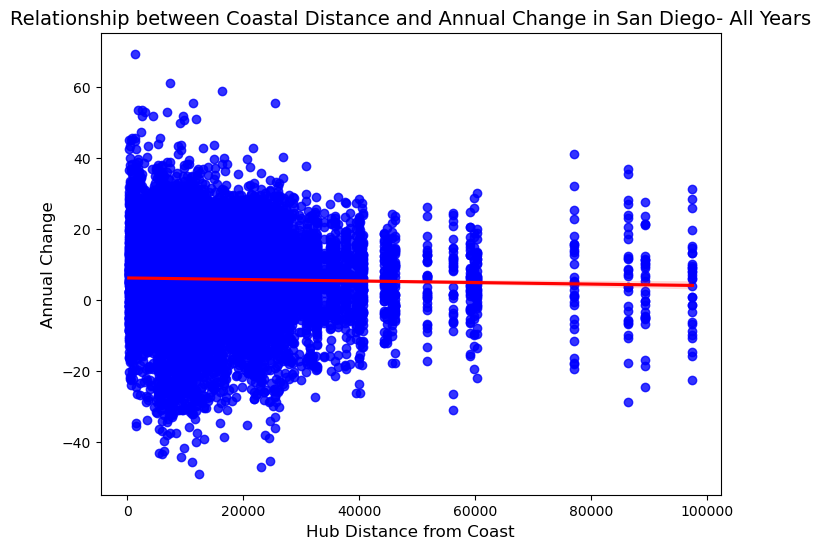

In [13]:
#plot 
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=metro_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

### San Diego Distance vs Change 2023

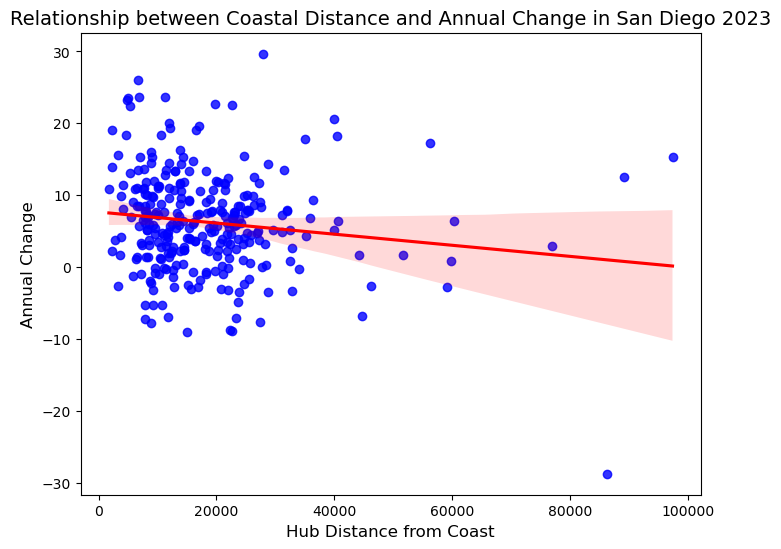

In [26]:
#now looking at plotting san diego for only 2023
san_diego_2023 = metro_df[metro_df['year'] == 2023]
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=san_diego_2023, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego 2023', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

### San Diego Distance vs Change 2005

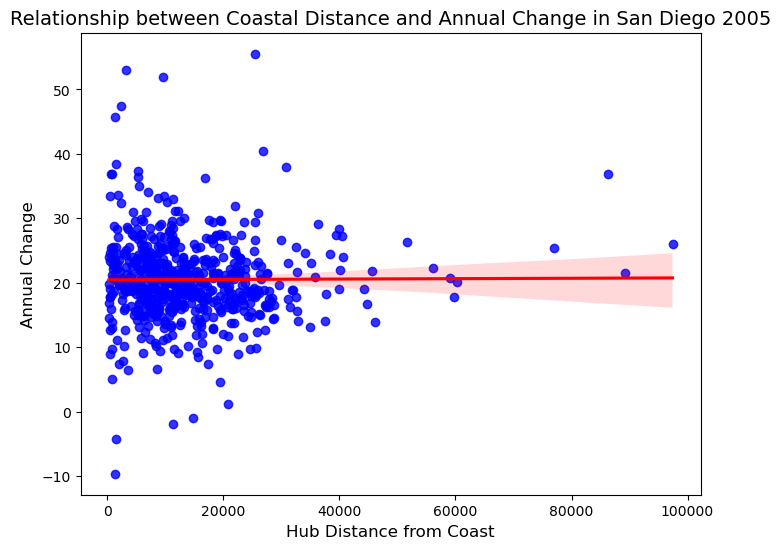

In [27]:
#now looking at plotting san diego for only 2005
san_diego_2005 = metro_df[metro_df['year'] == 2005]
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=san_diego_2005, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego 2005', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

### San Diego Distance vs Change 2007

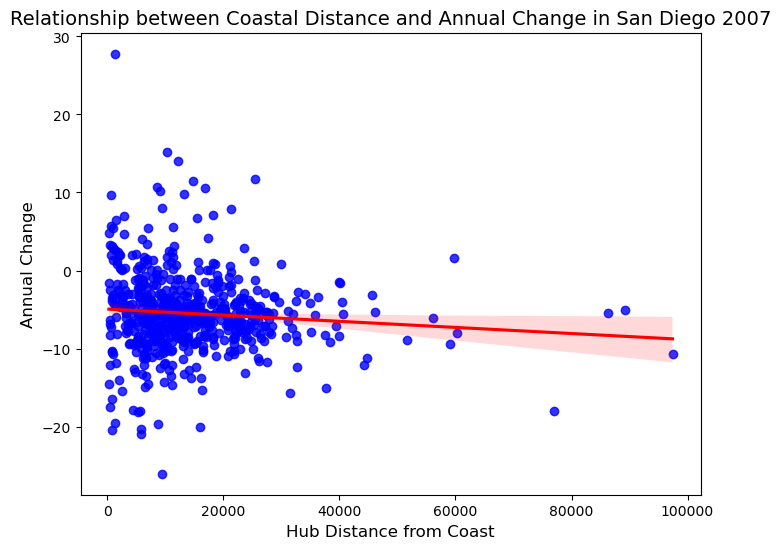

In [28]:
#now lets try for a year when average change is low -2007
san_diego_2007 = metro_df[metro_df['year'] == 2007]
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=san_diego_2007, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego 2007', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

### Plotting Annual change and Avg annual change to see yearly trends

In [15]:
#getting range of years
min_year = df['year'].min()
max_year = df['year'].max()
print(f"The range of year values is from {min_year} to {max_year}.")

The range of year values is from 1976.0 to 2023.0.


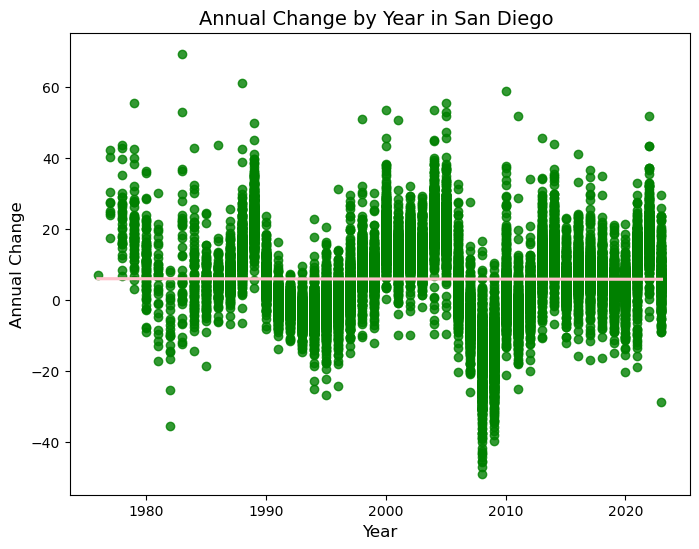

In [17]:
#plot annual change by year
plt.figure(figsize=(8, 6))
sns.regplot(x='year', y='annual_change', data=metro_df, scatter_kws={'color': 'green'}, line_kws={'color': 'pink'})
plt.title(f'Annual Change by Year in San Diego ', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

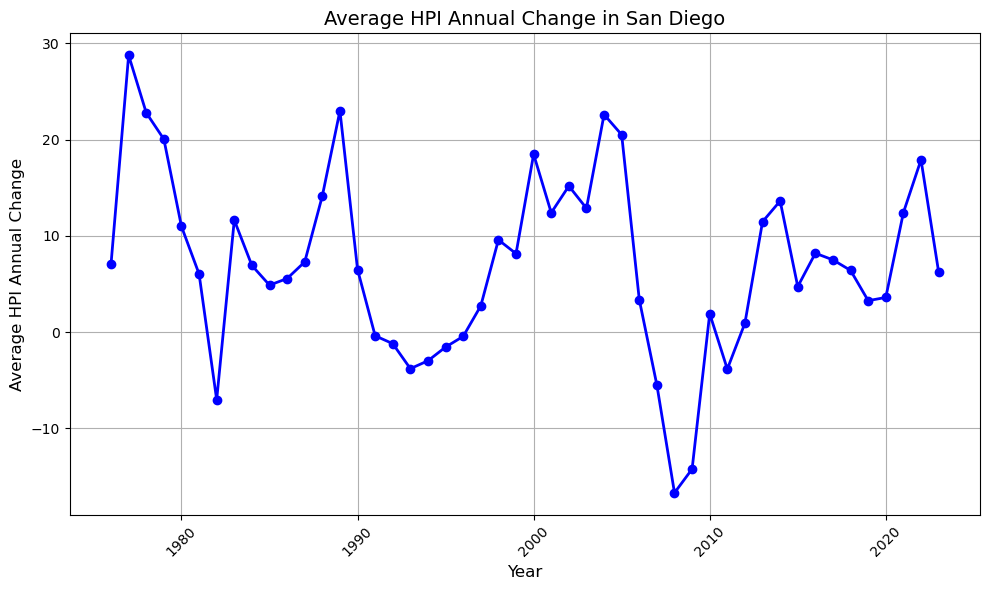

In [18]:
#now want to look at average annual change by year
average_annual_change = metro_df.groupby('year')['annual_change'].mean()
plt.figure(figsize=(10, 6))
average_annual_change.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Average HPI Annual Change in San Diego', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average HPI Annual Change', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()



### Ny Distance vs Change All Years

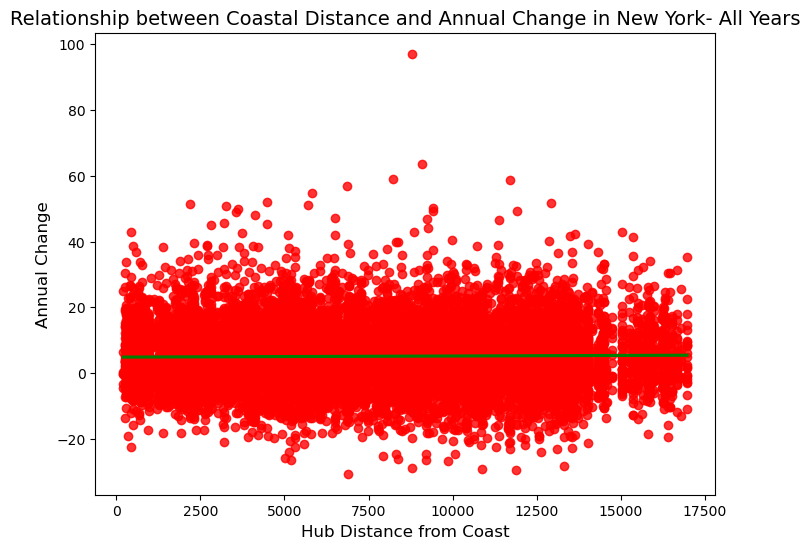

In [23]:
#now i want to look at the hub distance vs annual change for a city like new york
ny_df = df[df['Metro_area'] == 'New York']
#plot for new york
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=ny_df, scatter_kws={'color': 'red'}, line_kws={'color': 'green'})
plt.title(f'Relationship between Coastal Distance and Annual Change in New York- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

### Miami Distance vs Change All Years

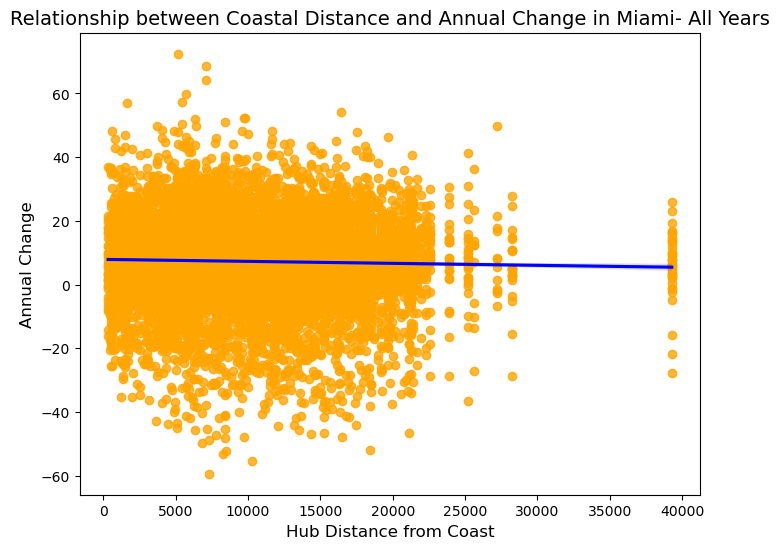

In [22]:
#let's see if miami looks more like san diego (the way we would expect it to be)
#now i want to look at the hub distance vs annual change for a city like new york
miami_df = df[df['Metro_area'] == 'Miami']
#plot for new york
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=miami_df, scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
plt.title(f'Relationship between Coastal Distance and Annual Change in Miami- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'df' contains 'latitude', 'longitude', 'Hub_distance', and 'annual_change'
# For this example, I'm assuming these columns exist in your dataframe.
# You may need to modify the dataset to include geospatial data or coordinates.

# Create a GeoDataFrame from your DataFrame (assuming df has 'latitude' and 'longitude')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Filter the data for San Diego in the year 2007
san_diego_2007 = gdf[gdf['Metro_area'] == 'San Diego']
san_diego_2007 = san_diego_2007[san_diego_2007['year'] == 2007]

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 8))

# Use Geopandas' built-in world map as the background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot properties with scatter, coloring by annual change and sizing by hub distance
scatter = ax.scatter(san_diego_2007['longitude'], san_diego_2007['latitude'], 
                     c=san_diego_2007['annual_change'], cmap='coolwarm', 
                     s=san_diego_2007['Hub_distance'] * 10,  # You can adjust the size scale
                     alpha=0.6, edgecolors="w", linewidth=0.5)

# Add a colorbar to the plot to indicate the range of HPI Annual Change
plt.colorbar(scatter, label='Annual Change')

# Add a title and labels
plt.title('Geographical Distribution of Properties in San Diego (2007)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'longitude'